In [77]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.figure(figsize = (22,16))

<Figure size 2200x1600 with 0 Axes>

<Figure size 2200x1600 with 0 Axes>

In [56]:
data_dir = "./../data"
os.listdir(data_dir)

['.gitkeep',
 'ica_mortgage_pricing_30_03_23.csv',
 'sbab_mortgage_pricing_30_03_23.csv']

In [23]:
filepath = os.path.join(data_dir, "sbab_mortgage_pricing_30_03_23.csv")
df = pd.read_csv(filepath, index_col=0)

In [24]:
df.head()

,LoptidText,Rantesats,Rantebindningstid,EffektivRantesats,loan_amount,asset_value,provider
0,2023-07-03,4.17,3,0.0,50000,50000,sbab
1,2024-04-03,4.92,12,0.0,50000,50000,sbab
2,2025-03-17,4.91,24,0.0,50000,50000,sbab
3,2026-03-17,4.73,36,0.0,50000,50000,sbab
4,2027-03-17,4.65,48,0.0,50000,50000,sbab


In [35]:
# standardise and strip superflous columns
superflous_cols = ["provider", "effektivrantesats", "loptidtext"]
relevant_cols = [c for c in df.columns if c not in superflous_cols]

df = df[relevant_cols]
df.columns = [c.lower().strip() for c in df.columns]

clean_columns_names = {
    "rantesats": "interest_rate",
    "rantebindningstid": "period",
    "loan_amount": "loan_volume",
}

df = df.rename(columns=clean_columns_names)
df.head()

,interest_rate,period,loan_volume,asset_value
0,4.17,3,50000,50000
1,4.92,12,50000,50000
2,4.91,24,50000,50000
3,4.73,36,50000,50000
4,4.65,48,50000,50000


In [135]:
# adding LTV ratios and dropping rows with LTVs > 1
df["ltv"] = df.loan_volume / df.asset_value
df = df.loc[df["ltv"] <= 1]

In [136]:
# subset into different maturity periods
three_month_df = df.loc[df.period == 3].drop(["period", "asset_value"], axis=1)

# adding discount (ambigious, but inferred through the max rate)
three_month_df["discount"] = three_month_df["interest_rate"] - three_month_df["interest_rate"].max()

In [137]:
three_month_df.discount.value_counts()

0.0    20100
Name: discount, dtype: int64

/var/folders/68/3p5ykqwn2d593c1wxw5v6sq80000gn/T/ipykernel_16373/970022698.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(three_month_df.pivot("loan_volume", "ltv", "discount"))


<Axes: xlabel='ltv', ylabel='loan_volume'>

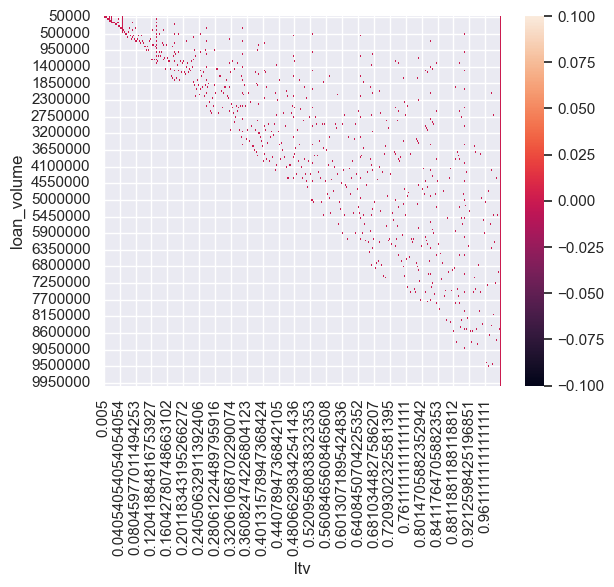

In [138]:
# Draw a heatmap with the numeric values in each cell
sns.heatmap(three_month_df.pivot("loan_volume", "ltv", "discount"))